In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Bandit import Bandit
from Agent import Agent

In [6]:
# Simulación
n = 1000

bandit = Bandit()
agent = Agent(epsilon=0.1, n_arms=bandit.n_arms)

rewards = np.zeros(n)
cumulative_rewards = np.zeros(n)


In [7]:
def run_experiment(epsilon, n_steps=1000, n_arms=10, n_experiments=2000):
    all_rewards = np.zeros(n_steps)
    
    for e in range(n_experiments):
        bandit = Bandit(n_arms)
        agent = Agent(epsilon, n_arms)
        rewards = np.zeros(n_steps)
        
        for t in range(n_steps):
            arm = agent.select_arm()
            reward = bandit.pull(arm)
            agent.update_estimates(arm, reward)
            rewards[t] = reward
        
        all_rewards += rewards
    
    average_rewards = all_rewards / n_experiments
    return average_rewards

In [14]:
n_steps=1000
epsilons = [0.0, 0.01, 0.1, 0.5]
rewards = {}
for epsilon in epsilons:
		rewards[epsilon] = run_experiment(epsilon, n_steps=n_steps)

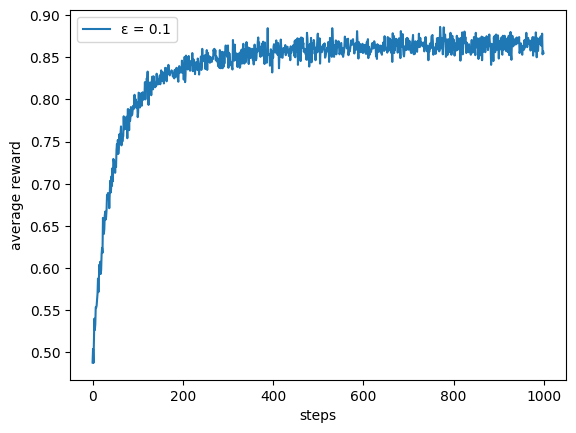

In [9]:
plt.plot(rewards, label=f'ε = {0.1}')
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend()
plt.show()

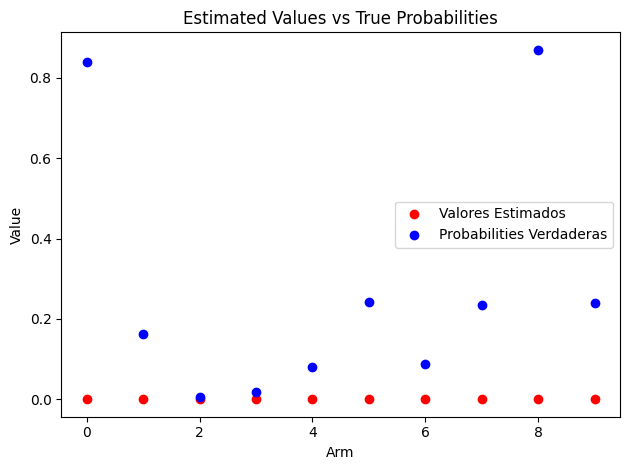

In [12]:
plt.scatter(range(bandit.n_arms), agent.rewards, label='Valores Estimados', color='red')
plt.scatter(range(bandit.n_arms), bandit.arms_probabilities, label='Probabilities Verdaderas', color='blue')
plt.xlabel('Arm')
plt.ylabel('Value')
plt.title('Estimated Values vs True Probabilities')
plt.legend()

plt.tight_layout()
plt.show()